# Classification Assigment

In [149]:
# dataset upload
import pandas as pd 

ds = pd.read_csv("model.csv", index_col=0)
ds1 = pd.read_csv("model.csv") #to check for duplicated indexes
ds

,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
id,,,,,,,,,,,,
1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0
4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0
5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0
...,...,...,...,...,...,...,...,...,...,...,...,...
102347,Female,25,1,B,32,Yes,< 1 Year,No,34695,152,133,0
102348,Female,47,1,M,28,No,1-2 Year,Yes,30564,26,114,1
102349,Male,72,1,M,8,No,> 2 Years,Yes,52844,124,92,1


## Data pre-processing: DATA PREPARATION (validation, transformation, reduction) AND ESPLORATION (univ, bivar, multivar)

### -- DATA VALIDATION --

In [150]:
# duplicated data

ds1["id"].unique() #no duplicates!

array([     1,      2,      3, ..., 102349, 102350, 102351], dtype=int64)

In [151]:
# missing data

nan = ds.isna()
nan.sum(axis = 0, skipna = True) #5091 missing data from License_Type corresponding to Driving_License = 0

Gender                     0
Age                        0
Driving_License            0
Licence_Type            5091
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Seniority                  0
Target                     0
dtype: int64

In [152]:
#substituting missing datas in the Licence_Type column with zeroes

ds_notna = ds.fillna(0)

### --DATA REDUCTION--

Target
0    69878
1    32473
dtype: int64


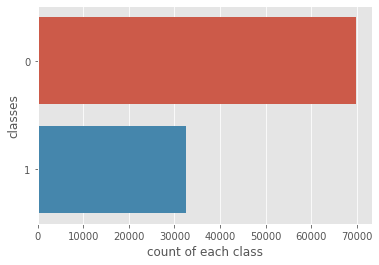

In [153]:
# Look at imbalancing of target
print(ds_notna.groupby('Target').size()) #"target" is the name of the target column, change it accordingly to your dataset
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=ds_notna.Target ,data=ds_notna) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [154]:
#Down-sample Majority Class
from sklearn.utils import resample

#1) Separate majority and minority classes
ds_majority = ds_notna[ds_notna.Target==0]
ds_minority = ds_notna[ds_notna.Target==1] 

ds_majority_downsampled = resample(ds_majority, 
                                   replace=False, 
                                   n_samples=32473,      #number of samples in minority class 
                                   random_state=120)
ds_downsampled = pd.concat([ds_majority_downsampled, ds_minority])
ds_downsampled.Target.value_counts()

1    32473
0    32473
Name: Target, dtype: int64

Target
0    32473
1    32473
dtype: int64


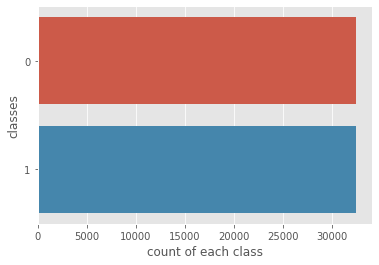

In [155]:
print(ds_downsampled.groupby('Target').size()) 

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=ds_downsampled.Target ,data=ds_downsampled) 
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [156]:
ds_downsampled = ds_downsampled.sort_index(ascending=True)

# Categorical variables

In [157]:
#check the variables type

ds_downsampled.dtypes

Gender                  object
Age                      int64
Driving_License          int64
Licence_Type            object
Region_Code              int64
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Seniority                int64
Target                   int64
dtype: object

In [158]:
#Driving_License, Region_Code and Policy_Sales_Channel are actually categorical variables, 
#so we have to convert them in object-type variables

ds_downsampled['Driving_License'] = ds_downsampled['Driving_License'].astype('object')
ds_downsampled['Region_Code'] = ds_downsampled['Region_Code'].astype('object')
ds_downsampled['Policy_Sales_Channel'] = ds_downsampled['Policy_Sales_Channel'].astype('object')

#Target is also a categorical variable, but we keep it with the numerical for now (useful for the pairplot)

In [159]:
ds_downsampled.dtypes

Gender                  object
Age                      int64
Driving_License         object
Licence_Type            object
Region_Code             object
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel    object
Seniority                int64
Target                   int64
dtype: object

In [160]:
#split categorical variables from the dataset

ds_cat = ds_downsampled.select_dtypes(include=['object']) #categorical
ds_cat

,Gender,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
id,,,,,,,,
1,Female,1,M,30,No,1-2 Year,Yes,154
4,Male,1,B,28,Yes,1-2 Year,No,26
5,Female,1,B,46,No,1-2 Year,Yes,124
6,Female,1,A,8,No,1-2 Year,Yes,124
7,Male,1,D,46,Yes,< 1 Year,No,152
...,...,...,...,...,...,...,...,...
102345,Male,1,C,14,No,1-2 Year,Yes,26
102347,Female,1,B,32,Yes,< 1 Year,No,152
102348,Female,1,M,28,No,1-2 Year,Yes,26


In [161]:
ds_cat.columns

Index(['Gender', 'Driving_License', 'Licence_Type', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Policy_Sales_Channel'],
      dtype='object')

In [162]:
#Converting categorical variables into boolean

dummies1 = pd.get_dummies(ds_cat[['Region_Code', 'Vehicle_Age', 'Policy_Sales_Channel']],drop_first=False)
dummies2 = pd.get_dummies(ds_cat[['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage', 'Licence_Type']],drop_first=True)
dummies = pd.concat([dummies1, dummies2], axis=1)

dummies

,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Policy_Sales_Channel_163,Gender_Male,Driving_License_1,Previously_Insured_Yes,Vehicle_Damage_Yes,Licence_Type_A,Licence_Type_B,Licence_Type_C,Licence_Type_D,Licence_Type_M
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102345,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,0
102347,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
102348,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


# Numerical Variables

In [163]:
ds_num = ds_downsampled.select_dtypes(include=['int64']) #numerical
ds_num

,Age,Annual_Premium,Seniority,Target
id,,,,
1,44,25741,152,0
4,60,48512,86,0
5,42,32169,132,0
6,40,34092,285,1
7,26,22452,59,0
...,...,...,...,...
102345,29,2630,88,1
102347,25,34695,133,0
102348,47,30564,114,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B503633D88>,
      dtype=object)

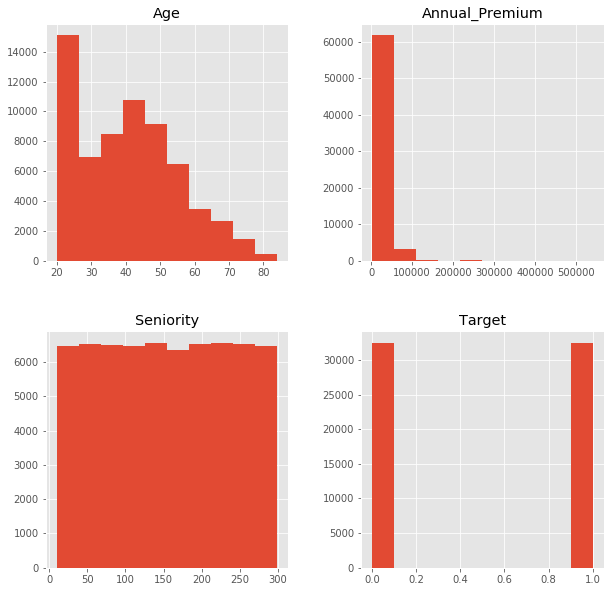

In [164]:
# operating with numerical variables

ds_num.hist(figsize=(10,10))

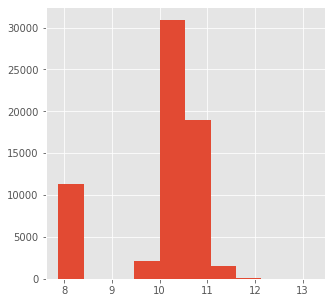

In [165]:
#log on Annual_Premium

import math
pd.options.mode.chained_assignment = None

ds_num['logPremium']=ds_num['Annual_Premium'].apply(math.log)

ds_num['logPremium'].hist(figsize=(5,5))

In [166]:
#pairplot
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
ds_num.columns

Index(['Age', 'Annual_Premium', 'Seniority', 'Target', 'logPremium'], dtype='object')

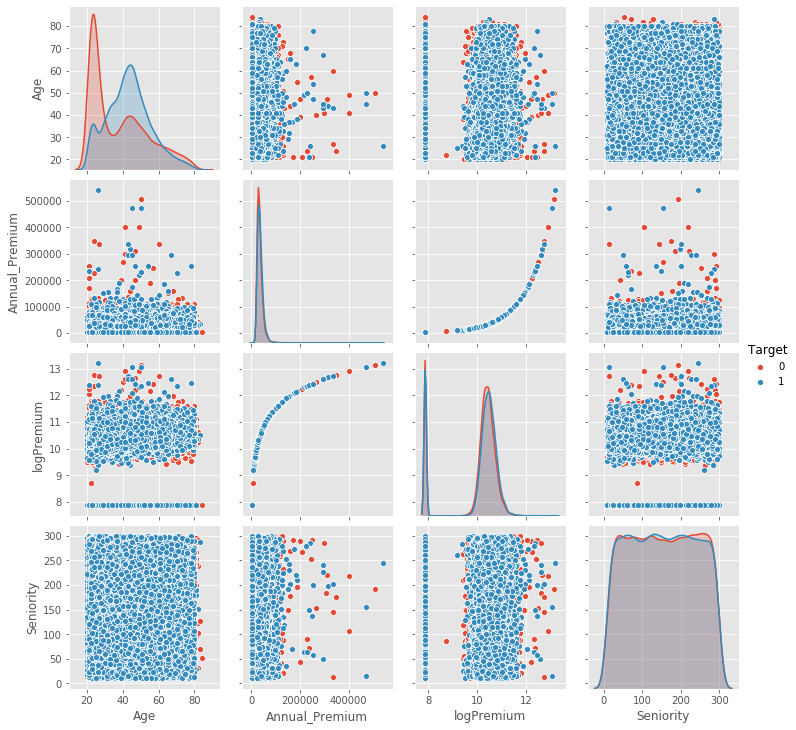

In [168]:
sns.pairplot(ds_num[['Age', 'Annual_Premium', 'logPremium', 'Seniority', 'Target',
       ]], hue='Target')

In [197]:
#now we can remove the Target column from ds_num (since it's actually a categorical variable) and keep it for the calssification
ds_target = ds_num.iloc[:,-2]
ds_target

id
1         0
4         0
5         0
6         1
7         0
         ..
102345    1
102347    0
102348    1
102349    1
102350    0
Name: Target, Length: 64946, dtype: int64

In [198]:
ds_num2 = ds_num.drop(['Target'], axis=1)
ds_num2

,Age,Annual_Premium,Seniority,logPremium
id,,,,
1,44,25741,152,10.155840
4,60,48512,86,10.789566
5,42,32169,132,10.378759
6,40,34092,285,10.436818
7,26,22452,59,10.019135
...,...,...,...,...
102345,29,2630,88,7.874739
102347,25,34695,133,10.454351
102348,47,30564,114,10.327578


# Outliers

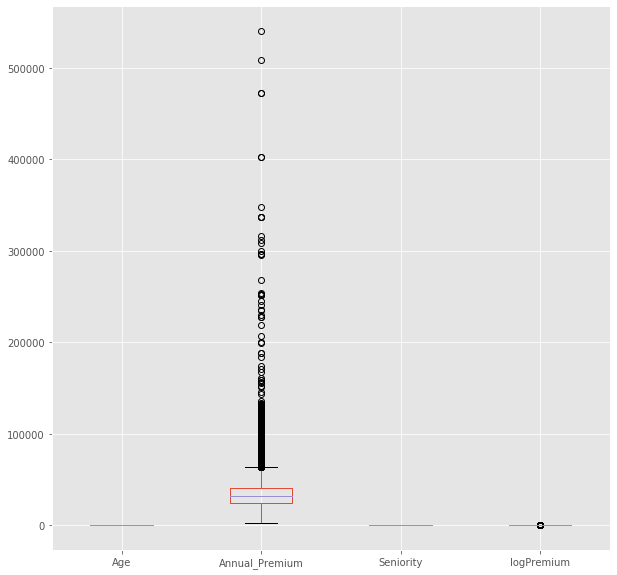

In [199]:
ds_num2.boxplot(figsize=(10,10)) #boxplot for all the numerical variables

count    63716.000000
mean     29942.418027
std      15418.931695
min       2630.000000
25%      24337.000000
50%      31941.500000
75%      39559.250000
max      67149.000000
Name: Annual_Premium, dtype: float64

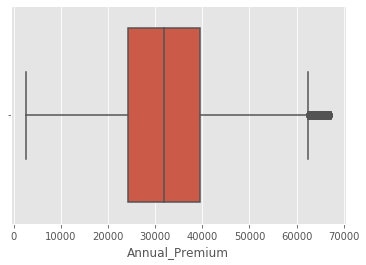

In [200]:
# noisy data (outliers) -> has sense doing that only for: Age; Region_Code; Annual_Premium; Policy_Sales_Channel; Seniority
import numpy as np

%matplotlib inline
import seaborn as sns

#sns.boxplot(x = ds['Age']) # Do not have outilers. all data keeped.
#sns.boxplot(x = ds['Region_Code']) # Do not have outilers. all data keeped.
#sns.boxplot(x = ds['Annual_Premium'])
#sns.boxplot(x = ds['Policy_Sales_Channel']) # Do not have outilers. all data keeped.
#sns.boxplot(x = ds['Seniority']) # Do not have outilers. all data keeped.

#ds["Annual_Premium"].describe()

#since it is normal then I CAN REMOVE OUTLIERS Using Normal Distribution and S.D
mean = ds_num2["Annual_Premium"].mean()
sd = ds_num2["Annual_Premium"].std()

# keep only the ones that are within +x to -x standard deviations in the column DIS
x = 2 # with 2 -> eliminate 2%, with 1 -> eliminate 28%
Annual_Premium = ds_num2["Annual_Premium"]
Annual_Premium_noOutlier = Annual_Premium[ np.abs(Annual_Premium - mean) <= x * sd ]

#sns.boxplot(x = ds['Annual_Premium'])
sns.boxplot(x = Annual_Premium_noOutlier)

#ds["Annual_Premium"].describe()
Annual_Premium_noOutlier.describe()

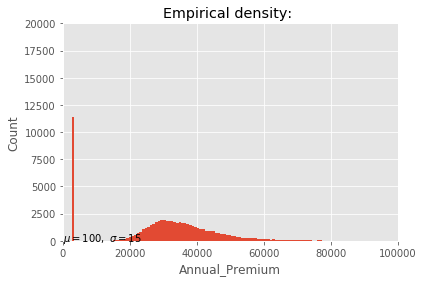

In [201]:
ds_num.hist(column="Annual_Premium",bins='auto')

plt.xlabel('Annual_Premium')
plt.ylabel('Count')
plt.title('Empirical density: ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 100000) #100000
plt.ylim(0, 20000)
plt.grid(True)
plt.show()

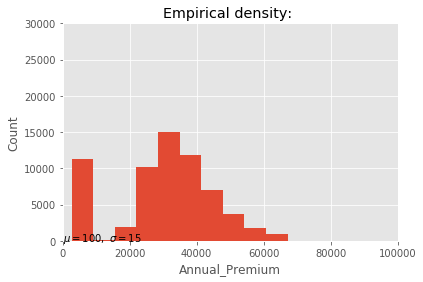

In [202]:
Annual_Premium_noOutlier.hist()

plt.xlabel('Annual_Premium')
plt.ylabel('Count')
plt.title('Empirical density: ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 100000) #100000
plt.ylim(0, 30000)
plt.grid(True)
plt.show()

In [203]:
# eliminate outliers data from ds
Annual_Premium_noOutlier1 = np.array(Annual_Premium_noOutlier.index)
ds_index = np.array(ds_num2.index)
Annual_Premium_Outlier = np.delete(ds_index, Annual_Premium_noOutlier1)

ds_num_noOL = ds_num2.drop(Annual_Premium_Outlier)


ds_num_noOL

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  after removing the cwd from sys.path.


,Age,Annual_Premium,Seniority,logPremium
id,,,,
4,60,48512,86,10.789566
7,26,22452,59,10.019135
8,28,36869,60,10.515126
10,33,27740,254,10.230631
11,36,45244,93,10.719825
...,...,...,...,...
102338,33,32203,256,10.379815
102344,24,15377,136,9.640628
102347,25,34695,133,10.454351


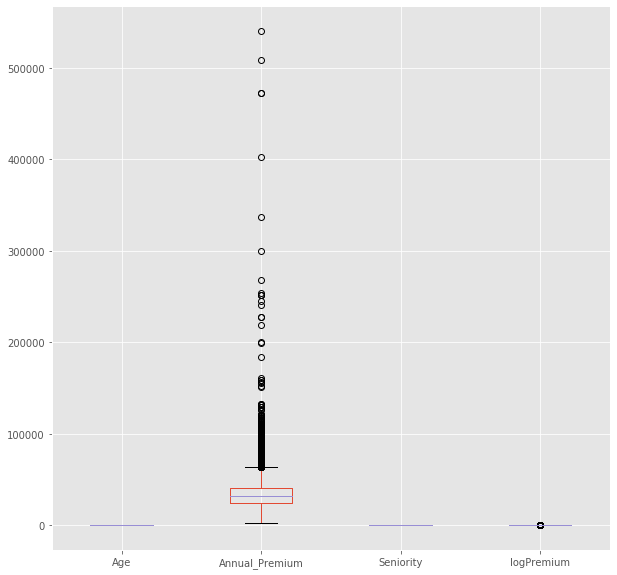

In [204]:
ds_num_noOL.boxplot(figsize=(10,10))

### -- DATA TRANSFORMATION --

# Standardization

In [205]:
#z-score
from sklearn.preprocessing import StandardScaler

zscaler = StandardScaler().fit(ds_toscale)
ds_zscaled = pd.DataFrame(zscaler.transform(ds_toscale))
ds_zscaled.index = ds_toscale.index
ds_zscaled.columns = ds_toscale.columns
ds_zscaled = ds_zscaled.sort_index(ascending=True)

ds_zscaled

,Age,Annual_Premium,Seniority,logPremium
id,,,,
4,1.339984,0.975953,-0.813762,0.756240
7,-1.032848,-0.473166,-1.135726,0.001151
8,-0.893270,0.328520,-1.123801,0.487265
10,-0.544324,-0.179116,1.189571,0.208435
11,-0.334956,0.794229,-0.730289,0.687888
...,...,...,...,...
102338,-0.544324,0.069058,1.213420,0.354648
102344,-1.172427,-0.866585,-0.217532,-0.369818
102347,-1.102638,0.207631,-0.253306,0.427700


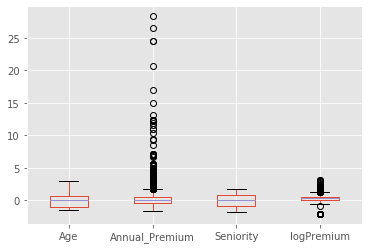

In [206]:
ds_zscaled.boxplot()

In [207]:
#minmax

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(copy=False,feature_range=(-1, 1)).fit(ds_num_noOL)
ds_mmscaled = pd.DataFrame(mmscaler.transform(ds_num_noOL))
ds_mmscaled.index = ds_num_noOL.index
ds_mmscaled.columns = ds_num_noOL.columns

#ds_mmscaled

In [208]:
#ds_mmscaled.boxplot()

In [209]:
# plotting of data (histograms for empirical density) + measure of central tendency, dispersion, relative location,
# asimmetry of density curve, kurtosis

# ...code...

# check if normal probability fall in a straight line

# ...code...

In [210]:
# feature extraction (make num atribute 2,4,6,7; new atributes; ...)

# ...code...

# plotting of data (histograms for empirical density) + measure of central tendency, dispersion, relative location

# ...code...

# check if normal probability fall in a streight line

# ...code...

In [211]:
# merging on ds_cat and ds_num
ds_final1 = pd.merge(dummies, ds_zscaled, left_index=True, right_index=True)
ds_final = pd.merge(ds_final1, ds_target, left_index=True, right_index=True)
ds_final

,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Licence_Type_A,Licence_Type_B,Licence_Type_C,Licence_Type_D,Licence_Type_M,Age,Annual_Premium,Seniority,logPremium,Target
id,,,,,,,,,,,,,,,,,,,,,
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1.339984,0.975953,-0.813762,0.756240,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,-1.032848,-0.473166,-1.135726,0.001151,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,-0.893270,0.328520,-1.123801,0.487265,1
10,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,-0.544324,-0.179116,1.189571,0.208435,1
11,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,-0.334956,0.794229,-0.730289,0.687888,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-0.544324,0.069058,1.213420,0.354648,1
102344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-1.172427,-0.866585,-0.217532,-0.369818,0
102347,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,-1.102638,0.207631,-0.253306,0.427700,0


### -- DATA REDUCTION --

In [36]:
# reduce the number of feature/atributes 
# -> FEATURE SELECTION (filter [we can filter by correlation with target], wrapper)
# (!! no need in classification tree !! embedded)

# ...code...

# -> PCA

# ...code...

In [37]:
# reduce the number of value (discretization -> pg 123 in pdf)

# ...code...

In [38]:
# plotting of data (histograms for empirical density) + measure of central tendency, dispersion, relative location

# ...code...

# check if normal probability fall in a streight line

# ...code...

## Models

In [189]:
#separating train and test set

X = ds_final.iloc[:,0:-1] #explanatory variables
y = ds_final.iloc[:,-1] #target variables

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.10,
                                                    stratify=y,
                                                    random_state= 666)

print(X_train.shape, X_test.shape)

(36434, 199) (4049, 199)


In [190]:
X.head()

,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Vehicle_Damage_Yes,Licence_Type_A,Licence_Type_B,Licence_Type_C,Licence_Type_D,Licence_Type_M,Age,Annual_Premium,Seniority,logPremium
id,,,,,,,,,,,,,,,,,,,,,
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1.339984,0.975953,-0.813762,0.756240
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,-1.032848,-0.473166,-1.135726,0.001151
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,-0.893270,0.328520,-1.123801,0.487265
10,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,-0.544324,-0.179116,1.189571,0.208435
11,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,-0.334956,0.794229,-0.730289,0.687888


In [191]:
y.head()

id
4     0
7     0
8     1
10    1
11    1
Name: Target, dtype: int64

In [192]:
#importing the quality metrics functions

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import f1_score

In [193]:
#funzione di ricerca dei parametri migliori

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("Mean %f Std (%f) with: %r" % (mean, stdev, param))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [194]:
#funzione curva roc

def roc(classifier,X_train,y_train,X_test,y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    y_probs = classifier.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

## KNN

In [196]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,100,10)}

hyperp_search(classifier,parameters) #adesso da errore perché ho interrotto l'esecuzione dello script

KeyboardInterrupt: 

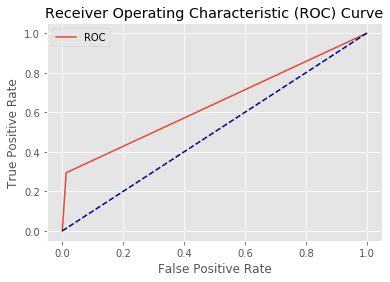

AUC: 0.64


In [53]:
classifier = KNeighborsClassifier(n_neighbors=)
fprknn,tprknn=roc(classifier,X_train,y_train,X_test,y_test)

## SVM

In [212]:
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":np.arange(1,100,1)}

hyperp_search(classifier,parameters)

KeyboardInterrupt: 

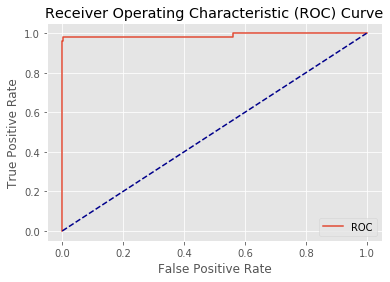

AUC: 0.99


In [52]:
classifier=SVC(C=100, kernel='rbf', probability=True)
fprsvm,tprsvm=roc(classifier,X_train,y_train,X_test,y_test)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,10],
              'min_samples_split': [20],
              'min_samples_leaf': [10]}

hyperp_search(classifier,parameters)

In [ ]:

fprt,tprt=roc(classifier,X_train,y_train,X_test,y_test)

## Logistic Regression

## Naive Bayes

## Multi-Layer Perceptron